In [1]:
import numpy as np
import tensorflow as tf
import sklearn, sklearn.linear_model, sklearn.multiclass, sklearn.naive_bayes
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size': 12})

## Loading the data

In [3]:
data = pd.read_csv('drawings.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Columns: 785 entries, 0 to label
dtypes: int64(785)
memory usage: 33.0 MB


In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
images = data.iloc[:, :-1].to_numpy()

In [7]:
labels = data.iloc[:, -1].to_numpy()

In [8]:
images = images.reshape(len(images), 28,  28, 1)

In [9]:
images.shape

(5517, 28, 28, 1)

### Plotting Images And Corresponding Labels

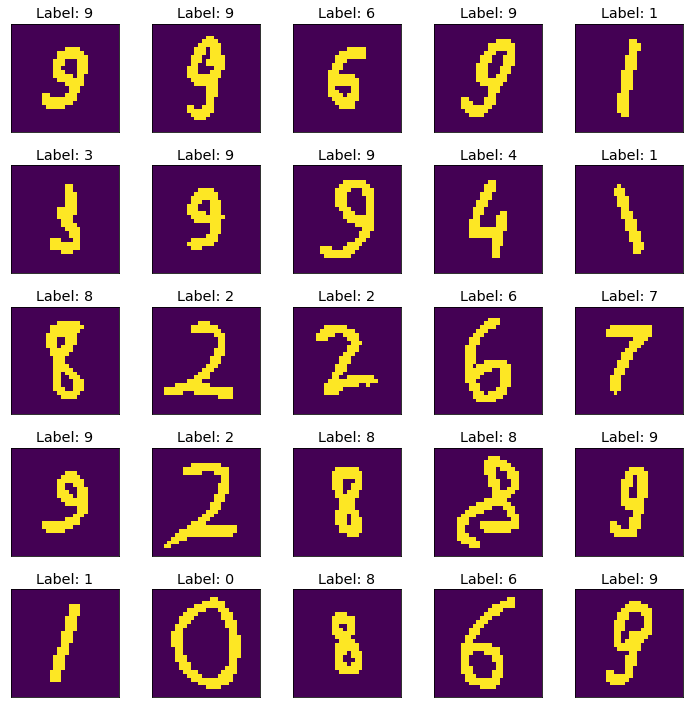

In [10]:
rows, cols = 5, 5

fig, axes = plt.subplots(rows, cols)

indices = np.random.choice(len(images), rows * cols)
counter = 0


for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(images[indices[counter]])
        axes[i, j].set_title(f"Label: {labels[indices[counter]]}")
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        counter += 1
        
plt.tight_layout()
plt.show()

In [11]:
labels = tf.keras.utils.to_categorical(labels)

In [12]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, stratify=labels)

In [13]:
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (4413, 28, 28, 1)
Test images shape: (1104, 28, 28, 1)
Train labels shape: (4413, 10)
Test labels shape: (1104, 10)


## Training

### Training On Drawn Images And Validating On The MNIST Dataset

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [15]:
def create_model(lr=0.001):
    model = Sequential([
        layers.Conv2D(64, 5, activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPool2D(2),
        layers.Conv2D(128, 5, activation='relu'),
        layers.MaxPool2D(2),
        layers.GlobalAveragePooling2D(),
        layers.Dense(10, activation='softmax')
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [16]:
model = create_model()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 207,882
Trainable params: 207,882
Non-trainable params: 0
__________________________________________________

In [18]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.3,
                                                           height_shift_range=0.10,
                                                           width_shift_range=0.10,
                                                           rotation_range=10)

train_datagen = train_gen.flow(train_images, train_labels, batch_size=256)

In [19]:
model.fit(train_datagen, initial_epoch=0, epochs=200,
                    validation_data=(test_images, test_labels))

Epoch 1/200
18/18 [==============================] - 4s 73ms/step - loss: 2.2157 - accuracy: 0.2042 - val_loss: 2.0458 - val_accuracy: 0.3995
Epoch 2/200
18/18 [==============================] - 1s 59ms/step - loss: 1.8779 - accuracy: 0.4283 - val_loss: 1.4283 - val_accuracy: 0.6096
Epoch 3/200
18/18 [==============================] - 1s 59ms/step - loss: 1.4201 - accuracy: 0.5663 - val_loss: 0.9167 - val_accuracy: 0.8071
Epoch 4/200
18/18 [==============================] - 1s 58ms/step - loss: 1.1157 - accuracy: 0.6646 - val_loss: 0.7222 - val_accuracy: 0.8442
Epoch 5/200
18/18 [==============================] - 1s 59ms/step - loss: 0.9413 - accuracy: 0.7154 - val_loss: 0.5652 - val_accuracy: 0.8433
Epoch 6/200
18/18 [==============================] - 1s 58ms/step - loss: 0.8156 - accuracy: 0.7544 - val_loss: 0.5778 - val_accuracy: 0.8188
Epoch 7/200
18/18 [==============================] - 1s 59ms/step - loss: 0.7207 - accuracy: 0.7804 - val_loss: 0.3851 - val_accuracy: 0.9085
Epoch 

#### Evaluating on drawn test data

In [20]:
model.evaluate(test_images, test_labels)

35/35 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9909


[0.032215896993875504, 0.9909420013427734]

In [21]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = tf.keras.datasets.mnist.load_data()

In [22]:
mnist_train_images = mnist_train_images.reshape(len(mnist_train_images), 28, 28, 1) / 255.0
mnist_test_images = mnist_test_images.reshape(len(mnist_test_images), 28, 28, 1) / 255.0         

In [23]:
mnist_train_images.shape

(60000, 28, 28, 1)

In [24]:
mnist_test_images.shape

(10000, 28, 28, 1)

In [25]:
mnist_train_labels = tf.keras.utils.to_categorical(mnist_train_labels)
mnist_test_labels = tf.keras.utils.to_categorical(mnist_test_labels)

In [26]:
mnist_images, mnist_labels = np.concatenate((mnist_train_images, mnist_test_images)), np.concatenate((mnist_train_labels, mnist_test_labels))

In [27]:
mnist_images.shape

(70000, 28, 28, 1)

In [28]:
mnist_labels.shape

(70000, 10)

#### Evaluating on MNIST data

In [29]:
model.evaluate(mnist_images, mnist_labels)

2188/2188 [==============================] - 7s 3ms/step - loss: 0.5623 - accuracy: 0.8545


[0.5623145699501038, 0.8545143008232117]

### Training On MNIST Images And Validating On Drawn Images

In [30]:
model = create_model()

In [31]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.3,
                                                           height_shift_range=0.10,
                                                           width_shift_range=0.10,
                                                           rotation_range=10)

train_datagen = train_gen.flow(mnist_train_images, mnist_train_labels, batch_size=256)

In [32]:
model.fit(train_datagen, initial_epoch=0, epochs=30,
          validation_data=(mnist_test_images, mnist_test_labels))

Epoch 1/30
235/235 [==============================] - 14s 60ms/step - loss: 1.0747 - accuracy: 0.6671 - val_loss: 0.3183 - val_accuracy: 0.9175
Epoch 2/30
235/235 [==============================] - 14s 60ms/step - loss: 0.4522 - accuracy: 0.8707 - val_loss: 0.1641 - val_accuracy: 0.9573
Epoch 3/30
235/235 [==============================] - 15s 64ms/step - loss: 0.3449 - accuracy: 0.9001 - val_loss: 0.1317 - val_accuracy: 0.9628
Epoch 4/30
235/235 [==============================] - 15s 64ms/step - loss: 0.2874 - accuracy: 0.9167 - val_loss: 0.1043 - val_accuracy: 0.9712
Epoch 5/30
235/235 [==============================] - 14s 59ms/step - loss: 0.2450 - accuracy: 0.9284 - val_loss: 0.0976 - val_accuracy: 0.9732
Epoch 6/30
235/235 [==============================] - 14s 58ms/step - loss: 0.2168 - accuracy: 0.9371 - val_loss: 0.0836 - val_accuracy: 0.9762
Epoch 7/30
235/235 [==============================] - 14s 61ms/step - loss: 0.1985 - accuracy: 0.9418 - val_loss: 0.0700 - val_accuracy:

#### Evaluating on MNIST test data

In [33]:
model.evaluate(mnist_test_images, mnist_test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9896


[0.035125136375427246, 0.9896000027656555]

#### Evaluating on drawn images

In [34]:
model.evaluate(images, labels)

173/173 [==============================] - 1s 3ms/step - loss: 0.1440 - accuracy: 0.9550


[0.14404082298278809, 0.9550480246543884]